# Healthcare Provider Fraud Detection Project
## Notebook 01 — Data Exploration and Feature Engineering

This notebook contains:
- Initial imports and loading
- Data understanding and exploration
- Data quality assessment
- Exploratory data analysis
- Provider-level feature aggregation
- Feature engineering


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
# Read uploaded CSV files
beneficiary = pd.read_csv('/content/Train_Beneficiarydata-1542865627584.csv')
inpatient = pd.read_csv('/content/Train_Inpatientdata-1542865627584.csv')
outpatient = pd.read_csv('/content/Train_Outpatientdata-1542865627584.csv')
labels = pd.read_csv('/content/Train-1542865627584.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("="*80)
print("1. DATA UNDERSTANDING & EXPLORATION")
print("="*80)

# Display first 5 rows of each table
print("\n1.1 Dataset Overview:")
print("\nBeneficiary data (first 5 rows):")
display(beneficiary.head())
print("\nInpatient data (first 5 rows):")
display(inpatient.head())
print("\nOutpatient data (first 5 rows):")
display(outpatient.head())
print("\nLabels (first 5 rows):")
display(labels.head())

print("\n1.2 Dataset Shapes:")
print(f"Beneficiary data: {beneficiary.shape}")
print(f"Inpatient data: {inpatient.shape}")
print(f"Outpatient data: {outpatient.shape}")
print(f"Labels: {labels.shape}")

print("\n1.3 Data Types and Basic Info:")
print("\nBeneficiary data info:")
display(beneficiary.info())
print("\nInpatient data info:")
display(inpatient.info())
print("\nOutpatient data info:")
display(outpatient.info())

1. DATA UNDERSTANDING & EXPLORATION

1.1 Dataset Overview:

Beneficiary data (first 5 rows):


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39.0,230.0,12.0,12.0,...,1.0,1.0,1.0,2.0,1.0,1.0,36000.0,3204.0,60.0,70.0
1,BENE11002,1936-09-01,NaN,2,1,0,39.0,280.0,12.0,12.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,30.0,50.0
2,BENE11003,1936-08-01,NaN,1,1,0,52.0,590.0,12.0,12.0,...,2.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,90.0,40.0
3,BENE11004,1922-07-01,NaN,1,1,0,39.0,270.0,12.0,12.0,...,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1810.0,760.0
4,BENE11005,1935-09-01,NaN,1,1,0,24.0,680.0,12.0,12.0,...,2.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,1790.0,1200.0



Inpatient data (first 5 rows):


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000.0,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000.0,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000.0,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000.0,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000.0,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN



Outpatient data (first 5 rows):


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947



Labels (first 5 rows):


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No



1.2 Dataset Shapes:
Beneficiary data: (63780, 25)
Inpatient data: (24797, 30)
Outpatient data: (35166, 27)
Labels: (5410, 2)

1.3 Data Types and Basic Info:

Beneficiary data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63780 entries, 0 to 63779
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BeneID                           63780 non-null  object 
 1   DOB                              63780 non-null  object 
 2   DOD                              678 non-null    object 
 3   Gender                           63780 non-null  int64  
 4   Race                             63780 non-null  int64  
 5   RenalDiseaseIndicator            63779 non-null  object 
 6   State                            63779 non-null  float64
 7   County                           63779 non-null  float64
 8   NoOfMonths_PartACov              63779 non-null  float64
 9   NoOfMonths_PartBCov   

None


Inpatient data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24797 entries, 0 to 24796
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  24797 non-null  object 
 1   ClaimID                 24797 non-null  object 
 2   ClaimStartDt            24797 non-null  object 
 3   ClaimEndDt              24797 non-null  object 
 4   Provider                24796 non-null  object 
 5   InscClaimAmtReimbursed  24796 non-null  float64
 6   AttendingPhysician      24723 non-null  object 
 7   OperatingPhysician      14622 non-null  object 
 8   OtherPhysician          2892 non-null   object 
 9   AdmissionDt             24796 non-null  object 
 10  ClmAdmitDiagnosisCode   24796 non-null  object 
 11  DeductibleAmtPaid       24263 non-null  float64
 12  DischargeDt             24796 non-null  object 
 13  DiagnosisGroupCode      24796 non-null  object 
 14  ClmDiagnosisCode

None


Outpatient data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35166 entries, 0 to 35165
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  35166 non-null  object 
 1   ClaimID                 35166 non-null  object 
 2   ClaimStartDt            35166 non-null  object 
 3   ClaimEndDt              35166 non-null  object 
 4   Provider                35166 non-null  object 
 5   InscClaimAmtReimbursed  35166 non-null  int64  
 6   AttendingPhysician      35082 non-null  object 
 7   OperatingPhysician      6165 non-null   object 
 8   OtherPhysician          13224 non-null  object 
 9   ClmDiagnosisCode_1      34501 non-null  object 
 10  ClmDiagnosisCode_2      21964 non-null  object 
 11  ClmDiagnosisCode_3      13869 non-null  object 
 12  ClmDiagnosisCode_4      8505 non-null   object 
 13  ClmDiagnosisCode_5      5071 non-null   object 
 14  ClmDiagnosisCod

None

In [ ]:
print("\n" + "="*80)
print("2. DATA QUALITY ASSESSMENT")
print("="*80)

# Check for missing values
print("\n2.1 Missing Values Analysis:")
print("Missing values in Beneficiary data:")
display(beneficiary.isnull().sum())

print("\nMissing values in Inpatient data:")
display(inpatient.isnull().sum())

print("\nMissing values in Outpatient data:")
display(outpatient.isnull().sum())

print("\nMissing values in Labels:")
display(labels.isnull().sum())

# Check for duplicates
print("\n2.2 Duplicate Records:")
print(f"Duplicate beneficiaries: {beneficiary.duplicated().sum()}")
print(f"Duplicate inpatient claims: {inpatient.duplicated().sum()}")
print(f"Duplicate outpatient claims: {outpatient.duplicated().sum()}")
print(f"Duplicate labels: {labels.duplicated().sum()}")

# Data consistency checks
print("\n2.3 Data Consistency Checks:")
print(f"Unique providers in labels: {labels['Provider'].nunique()}")
print(f"Unique providers in inpatient: {inpatient['Provider'].nunique()}")
print(f"Unique providers in outpatient: {outpatient['Provider'].nunique()}")
print(f"Unique beneficiaries: {beneficiary['BeneID'].nunique()}")


2. DATA QUALITY ASSESSMENT

2.1 Missing Values Analysis:
Missing values in Beneficiary data:


,0
BeneID,0
DOB,0
DOD,63102
Gender,0
Race,0
RenalDiseaseIndicator,1
State,1
County,1
NoOfMonths_PartACov,1
NoOfMonths_PartBCov,1



Missing values in Inpatient data:


,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,1
InscClaimAmtReimbursed,1
AttendingPhysician,74
OperatingPhysician,10175
OtherPhysician,21905
AdmissionDt,1



Missing values in Outpatient data:


,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,84
OperatingPhysician,29001
OtherPhysician,21942
ClmDiagnosisCode_1,665



Missing values in Labels:


,0
Provider,0
PotentialFraud,0



2.2 Duplicate Records:
Duplicate beneficiaries: 0
Duplicate inpatient claims: 0
Duplicate outpatient claims: 0
Duplicate labels: 0

2.3 Data Consistency Checks:
Unique providers in labels: 5410
Unique providers in inpatient: 1974
Unique providers in outpatient: 3581
Unique beneficiaries: 63780


In [ ]:
print("\n" + "="*80)
print("3. DATASET RELATIONSHIPS AND JOIN KEYS")
print("="*80)

print("\n3.1 Key Relationships:")
print("• Beneficiary ↔ Claims: BeneID")
print("• Claims ↔ Labels: Provider")
print("• Inpatient/Outpatient: Same structure, different claim types")

print("\n3.2 Granularity Levels:")
print(f"• Beneficiary data: {beneficiary.shape[0]} records at beneficiary level")
print(f"• Inpatient data: {inpatient.shape[0]} records at claim level")
print(f"• Outpatient data: {outpatient.shape[0]} records at claim level")
print(f"• Labels: {labels.shape[0]} records at provider level")

print("\n3.3 Common Providers Analysis:")
common_providers = set(inpatient['Provider']).intersection(set(outpatient['Provider']))
print(f"Providers with both inpatient & outpatient claims: {len(common_providers)}")


3. DATASET RELATIONSHIPS AND JOIN KEYS

3.1 Key Relationships:
• Beneficiary ↔ Claims: BeneID
• Claims ↔ Labels: Provider
• Inpatient/Outpatient: Same structure, different claim types

3.2 Granularity Levels:
• Beneficiary data: 63780 records at beneficiary level
• Inpatient data: 24797 records at claim level
• Outpatient data: 35166 records at claim level
• Labels: 5410 records at provider level

3.3 Common Providers Analysis:
Providers with both inpatient & outpatient claims: 1340



4. EXPLORATORY ANALYSIS - BENEFICIARIES

4.1 Beneficiary Demographics:


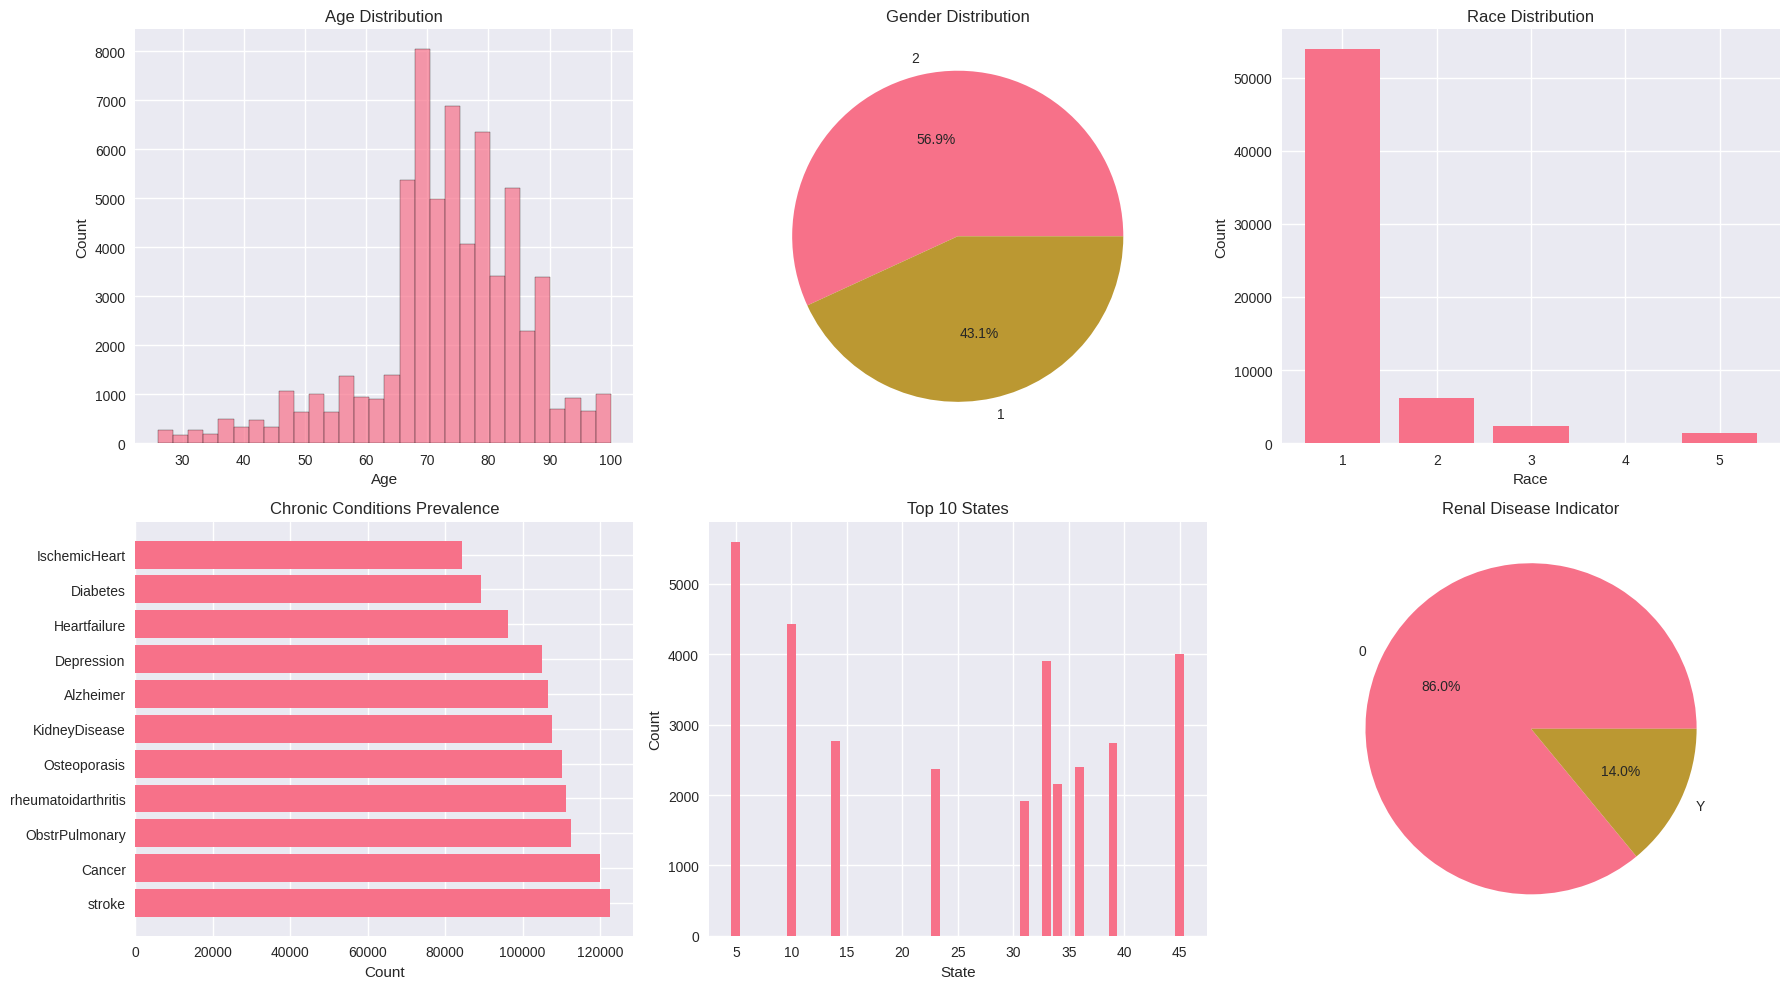


4.2 Chronic Conditions Summary:


,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
count,63779.000000,63779.000000,63779.000000,63779.000000,63779.000000,63779.000000,63779.000000,63779.000000,63779.000000,63779.000000,63779.000000
mean,1.669092,1.507048,1.688001,1.882736,1.762210,1.645918,1.398909,1.322206,1.726274,1.743411,1.920162
std,0.470544,0.499954,0.463313,0.321737,0.425733,0.478238,0.489678,0.467325,0.445874,0.436754,0.271045
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
print("\n" + "="*80)
print("4. EXPLORATORY ANALYSIS - BENEFICIARIES")
print("="*80)

# Fix date conversion for beneficiary data
print("\n4.1 Beneficiary Demographics:")
try:
    beneficiary['DOB'] = pd.to_datetime(beneficiary['DOB'], errors='coerce')
    beneficiary['DOD'] = pd.to_datetime(beneficiary['DOD'], errors='coerce')

    # Calculate age (using a reference date from the data context)
    reference_date = pd.to_datetime('2009-12-01')
    beneficiary['Age'] = (reference_date - beneficiary['DOB']).dt.days / 365.25
    beneficiary['Age'] = beneficiary['Age'].astype(int)
except Exception as e:
    print(f"Error processing beneficiary dates: {e}")
    beneficiary['Age'] = 50  # Default age for analysis

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Age distribution
axes[0,0].hist(beneficiary['Age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Count')

# Gender distribution
gender_counts = beneficiary['Gender'].value_counts()
axes[0,1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Gender Distribution')

# Race distribution
race_counts = beneficiary['Race'].value_counts()
axes[0,2].bar(race_counts.index, race_counts.values)
axes[0,2].set_title('Race Distribution')
axes[0,2].set_xlabel('Race')
axes[0,2].set_ylabel('Count')

# Chronic conditions
chronic_cols = [col for col in beneficiary.columns if 'ChronicCond' in col]
chronic_counts = beneficiary[chronic_cols].sum().sort_values(ascending=False)
axes[1,0].barh(range(len(chronic_counts)), chronic_counts.values)
axes[1,0].set_yticks(range(len(chronic_counts)))
axes[1,0].set_yticklabels([col.replace('ChronicCond_', '') for col in chronic_counts.index])
axes[1,0].set_title('Chronic Conditions Prevalence')
axes[1,0].set_xlabel('Count')

# State distribution
state_counts = beneficiary['State'].value_counts().head(10)
axes[1,1].bar(state_counts.index, state_counts.values)
axes[1,1].set_title('Top 10 States')
axes[1,1].set_xlabel('State')
axes[1,1].set_ylabel('Count')

# Renal disease indicator
renal_counts = beneficiary['RenalDiseaseIndicator'].value_counts()
axes[1,2].pie(renal_counts.values, labels=renal_counts.index, autopct='%1.1f%%')
axes[1,2].set_title('Renal Disease Indicator')

plt.tight_layout()
plt.show()

print("\n4.2 Chronic Conditions Summary:")
chronic_summary = beneficiary[chronic_cols].describe()
display(chronic_summary)

In [ ]:
print("\n" + "="*80)
print("5. EXPLORATORY ANALYSIS - CLAIMS DATA")
print("="*80)

# Fix date conversion for claims data with error handling
print("Processing date columns...")
date_columns = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']

for col in date_columns:
    if col in inpatient.columns:
        try:
            inpatient[col] = pd.to_datetime(inpatient[col], errors='coerce')
            print(f"Processed {col} in inpatient: {inpatient[col].notna().sum()} valid dates")
        except Exception as e:
            print(f"Error processing {col} in inpatient: {e}")
            inpatient[col] = pd.NaT

    if col in outpatient.columns:
        try:
            outpatient[col] = pd.to_datetime(outpatient[col], errors='coerce')
            print(f"Processed {col} in outpatient: {outpatient[col].notna().sum()} valid dates")
        except Exception as e:
            print(f"Error processing {col} in outpatient: {e}")
            outpatient[col] = pd.NaT


5. EXPLORATORY ANALYSIS - CLAIMS DATA
Processing date columns...
Processed ClaimStartDt in inpatient: 24797 valid dates
Processed ClaimStartDt in outpatient: 35166 valid dates
Processed ClaimEndDt in inpatient: 24796 valid dates
Processed ClaimEndDt in outpatient: 35166 valid dates
Processed AdmissionDt in inpatient: 24796 valid dates
Processed DischargeDt in inpatient: 24796 valid dates



5.1 Claims Temporal Analysis:


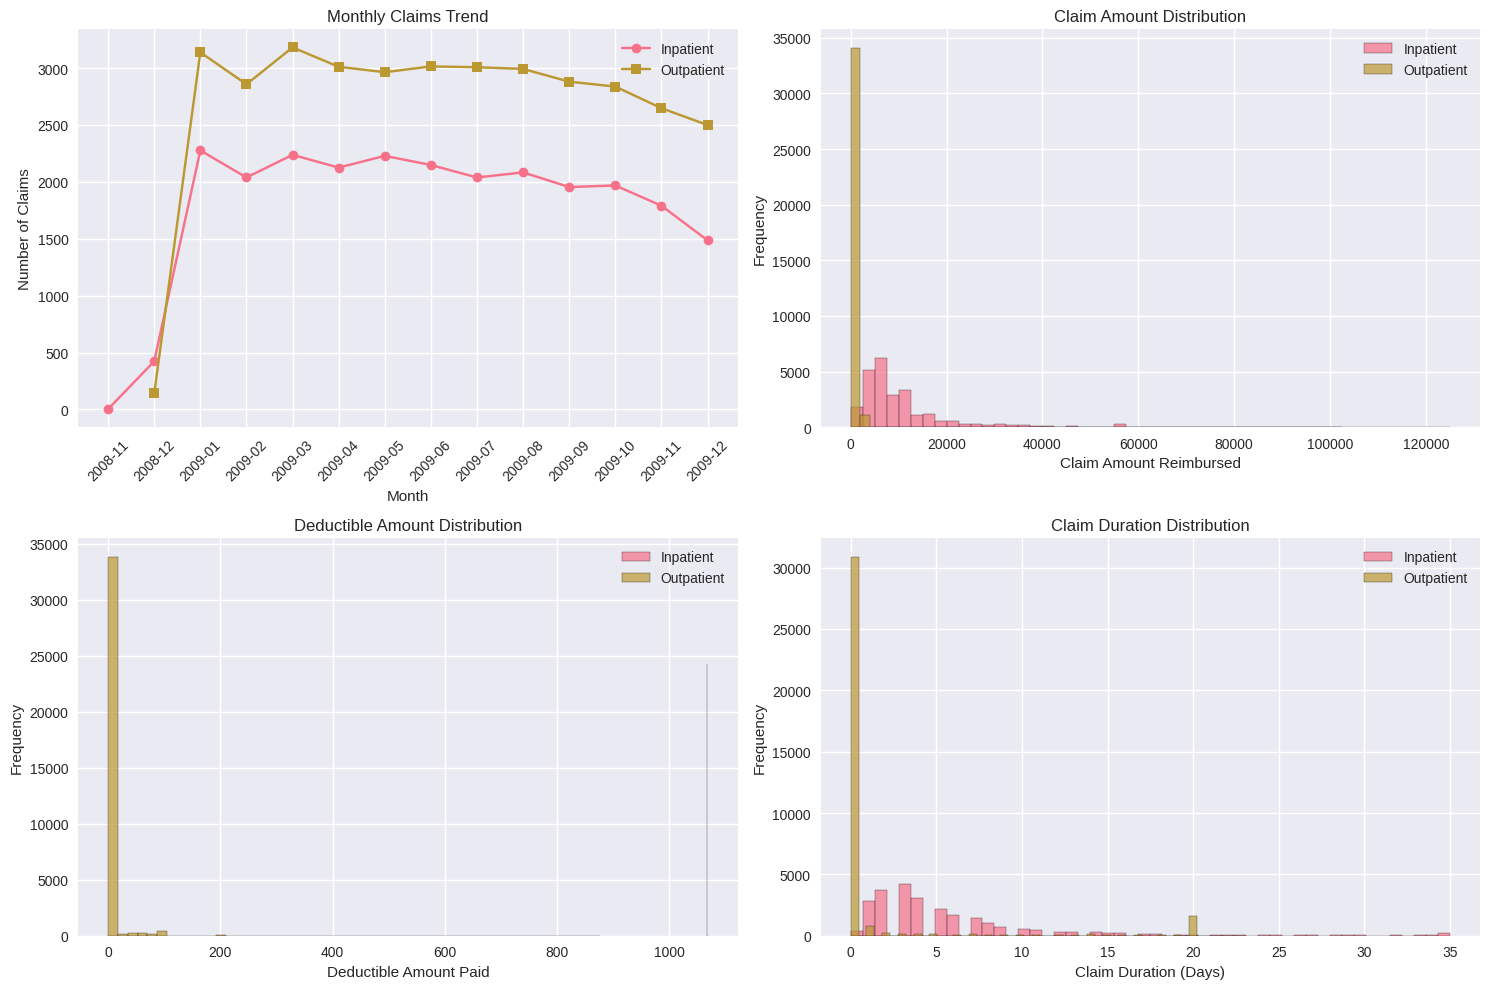

In [ ]:
print("\n5.1 Claims Temporal Analysis:")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Monthly claim trends with error handling
try:
    inpatient['ClaimMonth'] = inpatient['ClaimStartDt'].dt.to_period('M')
    outpatient['ClaimMonth'] = outpatient['ClaimStartDt'].dt.to_period('M')

    monthly_inpatient = inpatient.groupby('ClaimMonth').size()
    monthly_outpatient = outpatient.groupby('ClaimMonth').size()

    axes[0,0].plot(monthly_inpatient.index.astype(str), monthly_inpatient.values, marker='o', label='Inpatient')
    axes[0,0].plot(monthly_outpatient.index.astype(str), monthly_outpatient.values, marker='s', label='Outpatient')
    axes[0,0].set_title('Monthly Claims Trend')
    axes[0,0].set_xlabel('Month')
    axes[0,0].set_ylabel('Number of Claims')
    axes[0,0].legend()
    axes[0,0].tick_params(axis='x', rotation=45)
except Exception as e:
    axes[0,0].text(0.5, 0.5, f"Error in temporal analysis:\n{e}", ha='center', va='center')
    axes[0,0].set_title('Monthly Claims Trend (Error)')

# Claim amount distribution
try:
    axes[0,1].hist(inpatient['InscClaimAmtReimbursed'].dropna(), bins=50, alpha=0.7, label='Inpatient', edgecolor='black')
    axes[0,1].hist(outpatient['InscClaimAmtReimbursed'].dropna(), bins=50, alpha=0.7, label='Outpatient', edgecolor='black')
    axes[0,1].set_title('Claim Amount Distribution')
    axes[0,1].set_xlabel('Claim Amount Reimbursed')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].legend()
except Exception as e:
    axes[0,1].text(0.5, 0.5, f"Error in amount analysis:\n{e}", ha='center', va='center')
    axes[0,1].set_title('Claim Amount Distribution (Error)')

# Deductible amount
try:
    axes[1,0].hist(inpatient['DeductibleAmtPaid'].dropna(), bins=50, alpha=0.7, label='Inpatient', edgecolor='black')
    axes[1,0].hist(outpatient['DeductibleAmtPaid'].dropna(), bins=50, alpha=0.7, label='Outpatient', edgecolor='black')
    axes[1,0].set_title('Deductible Amount Distribution')
    axes[1,0].set_xlabel('Deductible Amount Paid')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].legend()
except Exception as e:
    axes[1,0].text(0.5, 0.5, f"Error in deductible analysis:\n{e}", ha='center', va='center')
    axes[1,0].set_title('Deductible Amount Distribution (Error)')

# Claim duration with error handling
try:
    inpatient['ClaimDuration'] = (inpatient['ClaimEndDt'] - inpatient['ClaimStartDt']).dt.days
    outpatient['ClaimDuration'] = (outpatient['ClaimEndDt'] - outpatient['ClaimStartDt']).dt.days

    axes[1,1].hist(inpatient['ClaimDuration'].dropna(), bins=50, alpha=0.7, label='Inpatient', edgecolor='black')
    axes[1,1].hist(outpatient['ClaimDuration'].dropna(), bins=50, alpha=0.7, label='Outpatient', edgecolor='black')
    axes[1,1].set_title('Claim Duration Distribution')
    axes[1,1].set_xlabel('Claim Duration (Days)')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].legend()
except Exception as e:
    axes[1,1].text(0.5, 0.5, f"Error in duration analysis:\n{e}", ha='center', va='center')
    axes[1,1].set_title('Claim Duration Distribution (Error)')

plt.tight_layout()
plt.show()


5.2 Geographic Patterns - State-wise Analysis:
Top 10 States by Total Claim Amount:


,Inpatient_Claims,Outpatient_Claims,Inpatient_Amount,Outpatient_Amount,Total_Claims,Total_Amount
State,,,,,,
5.0,1565,3326,15439270.0,924520,4891,16363790.0
10.0,1435,2444,14863650.0,741090,3879,15604740.0
45.0,1207,2139,12343300.0,562070,3346,12905370.0
33.0,1192,2357,12228870.0,594140,3549,12823010.0
39.0,874,1527,9352400.0,435180,2401,9787580.0
36.0,793,1265,8204580.0,406500,2058,8611080.0
14.0,785,1551,7677200.0,439760,2336,8116960.0
34.0,701,1156,7270690.0,388930,1857,7659620.0
11.0,575,1049,5610800.0,298050,1624,5908850.0


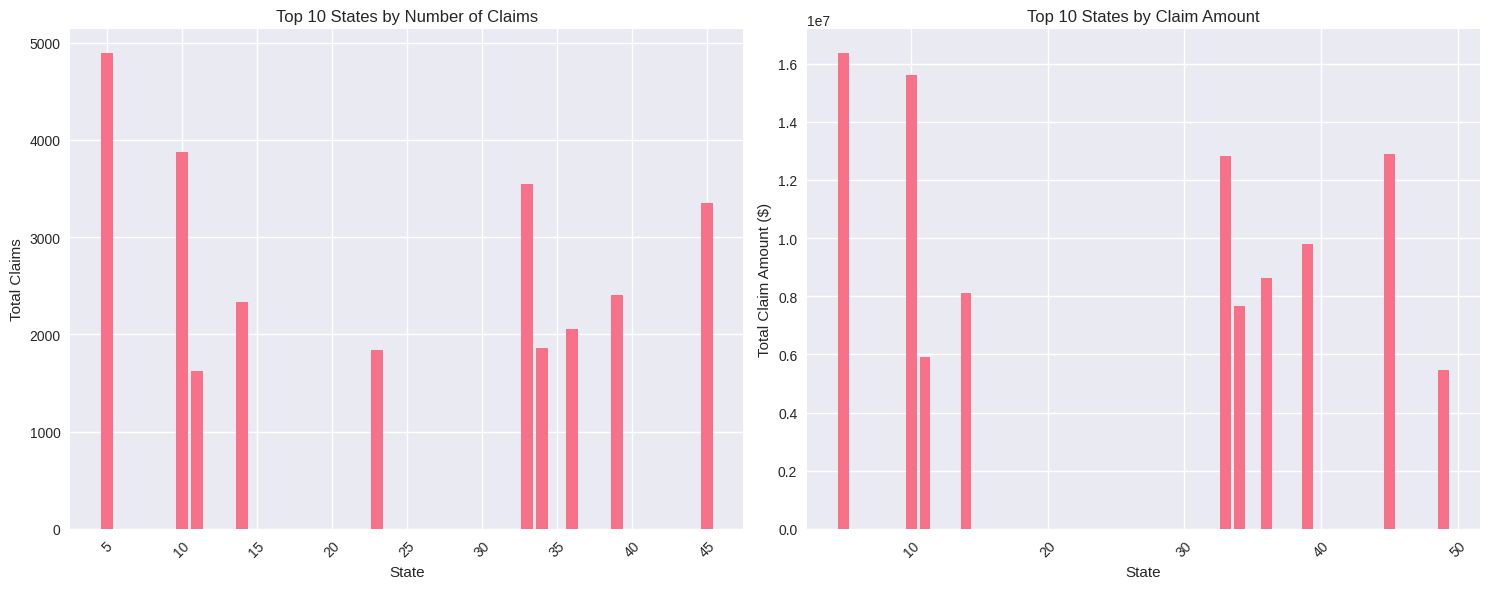

In [ ]:
print("\n5.2 Geographic Patterns - State-wise Analysis:")

# Merge to get state information with error handling
try:
    inpatient_with_state = inpatient.merge(beneficiary[['BeneID', 'State']], on='BeneID', how='left')
    outpatient_with_state = outpatient.merge(beneficiary[['BeneID', 'State']], on='BeneID', how='left')

    state_claim_analysis = pd.DataFrame({
        'Inpatient_Claims': inpatient_with_state['State'].value_counts(),
        'Outpatient_Claims': outpatient_with_state['State'].value_counts(),
        'Inpatient_Amount': inpatient_with_state.groupby('State')['InscClaimAmtReimbursed'].sum(),
        'Outpatient_Amount': outpatient_with_state.groupby('State')['InscClaimAmtReimbursed'].sum()
    }).fillna(0)

    state_claim_analysis['Total_Claims'] = state_claim_analysis['Inpatient_Claims'] + state_claim_analysis['Outpatient_Claims']
    state_claim_analysis['Total_Amount'] = state_claim_analysis['Inpatient_Amount'] + state_claim_analysis['Outpatient_Amount']

    print("Top 10 States by Total Claim Amount:")
    display(state_claim_analysis.nlargest(10, 'Total_Amount'))

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Top states by claims
    top_states_claims = state_claim_analysis.nlargest(10, 'Total_Claims')['Total_Claims']
    axes[0].bar(top_states_claims.index, top_states_claims.values)
    axes[0].set_title('Top 10 States by Number of Claims')
    axes[0].set_xlabel('State')
    axes[0].set_ylabel('Total Claims')
    axes[0].tick_params(axis='x', rotation=45)

    # Top states by amount
    top_states_amount = state_claim_analysis.nlargest(10, 'Total_Amount')['Total_Amount']
    axes[1].bar(top_states_amount.index, top_states_amount.values)
    axes[1].set_title('Top 10 States by Claim Amount')
    axes[1].set_xlabel('State')
    axes[1].set_ylabel('Total Claim Amount ($)')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in geographic analysis: {e}")

In [ ]:
print("\n" + "="*80)
print("6. PROVIDER-LEVEL AGGREGATION STRATEGY")
print("="*80)

print("\n6.1 Comprehensive Provider Aggregation:")

def aggregate_provider_data(claims_df, claim_type):
    """Aggregate claim-level data to provider level with error handling"""
    try:
        provider_agg = claims_df.groupby('Provider').agg({
            'InscClaimAmtReimbursed': ['sum', 'mean', 'std', 'count'],
            'DeductibleAmtPaid': ['sum', 'mean'],
            'AttendingPhysician': 'nunique',
            'OperatingPhysician': 'nunique',
            'OtherPhysician': 'nunique',
        }).round(2)

        # Flatten column names
        provider_agg.columns = [f'{claim_type}_{col[0]}_{col[1]}' if col[1] != '' else f'{claim_type}_{col[0]}'
                               for col in provider_agg.columns]

        return provider_agg
    except Exception as e:
        print(f"Error in aggregation for {claim_type}: {e}")
        return pd.DataFrame()


6. PROVIDER-LEVEL AGGREGATION STRATEGY

6.1 Comprehensive Provider Aggregation:


In [ ]:
# Aggregate both inpatient and outpatient data
inpatient_provider = aggregate_provider_data(inpatient, 'inpatient')
outpatient_provider = aggregate_provider_data(outpatient, 'outpatient')

# Merge both claim types
try:
    provider_features = pd.merge(inpatient_provider, outpatient_provider, on='Provider', how='outer').fillna(0)

    # Calculate ratios and additional features
    provider_features['total_claims'] = provider_features['inpatient_InscClaimAmtReimbursed_count'] + provider_features['outpatient_InscClaimAmtReimbursed_count']
    provider_features['inpatient_ratio'] = np.where(
        provider_features['total_claims'] > 0,
        provider_features['inpatient_InscClaimAmtReimbursed_count'] / provider_features['total_claims'],
        0
    )
    provider_features['avg_claim_amount'] = np.where(
        provider_features['total_claims'] > 0,
        (provider_features['inpatient_InscClaimAmtReimbursed_sum'] + provider_features['outpatient_InscClaimAmtReimbursed_sum']) / provider_features['total_claims'],
        0
    )
    provider_features['physician_variety'] = provider_features['inpatient_AttendingPhysician_nunique'] + provider_features['outpatient_AttendingPhysician_nunique']

    # Merge with fraud labels
    provider_analysis = provider_features.merge(labels, on='Provider', how='left')

    print(f"Aggregated features for {provider_analysis.shape[0]} providers")
    print(f"Number of features: {provider_analysis.shape[1] - 2}")  # Excluding Provider and PotentialFraud

    print("\n6.2 Provider Aggregation Summary:")
    display(provider_analysis[['total_claims', 'inpatient_ratio', 'avg_claim_amount']].describe())

except Exception as e:
    print(f"Error in provider aggregation: {e}")
    # Create a simple provider analysis as fallback
    provider_analysis = labels.copy()
    provider_analysis['total_claims'] = 0
    provider_analysis['inpatient_ratio'] = 0
    provider_analysis['avg_claim_amount'] = 0

Aggregated features for 4215 providers
Number of features: 22

6.2 Provider Aggregation Summary:


,total_claims,inpatient_ratio,avg_claim_amount
count,4215.00000,4215.000000,4215.000000
mean,14.22586,0.330735,3639.540486
std,28.51628,0.404804,5259.548178
min,1.00000,0.000000,0.000000
25%,2.00000,0.000000,150.000000
50%,5.00000,0.000000,700.000000
75%,13.00000,0.750000,6455.238095
max,586.00000,1.000000,57000.000000



7. FRAUD VS LEGITIMATE PROVIDER COMPARISON

7.1 Target Class Distribution:


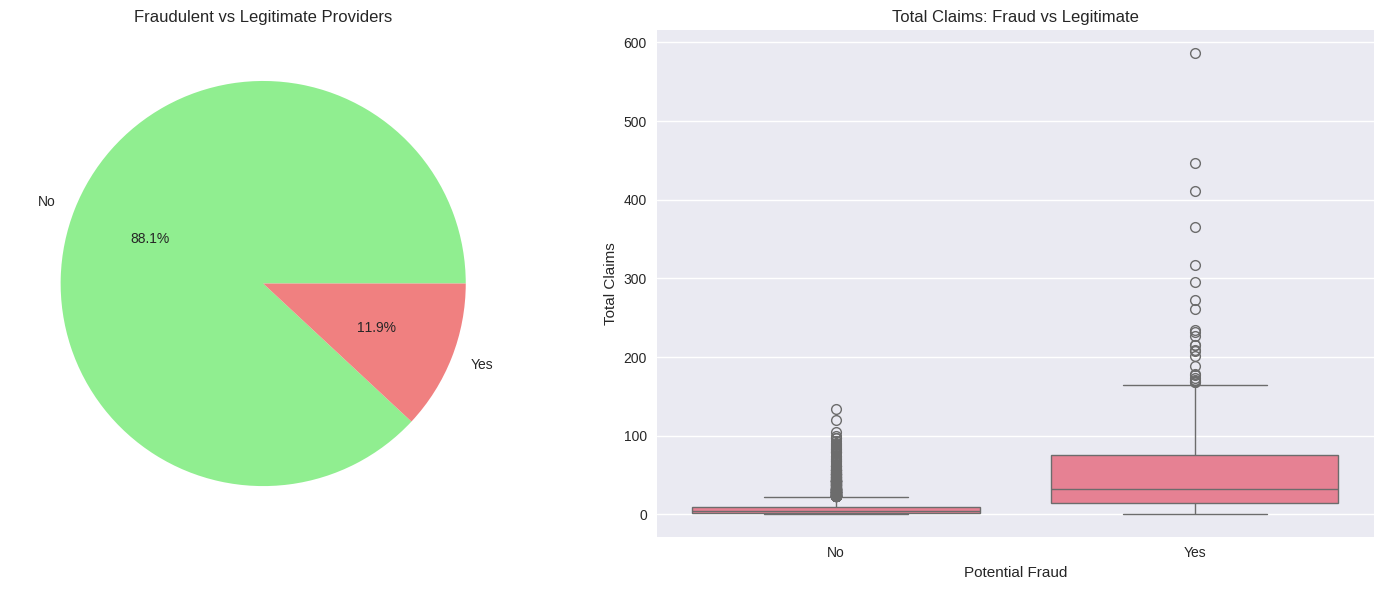

In [ ]:
print("\n" + "="*80)
print("7. FRAUD VS LEGITIMATE PROVIDER COMPARISON")
print("="*80)

print("\n7.1 Target Class Distribution:")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Fraud distribution
fraud_counts = provider_analysis['PotentialFraud'].value_counts()
axes[0].pie(fraud_counts.values, labels=fraud_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axes[0].set_title('Fraudulent vs Legitimate Providers')

# Claims distribution by fraud status
try:
    sns.boxplot(x='PotentialFraud', y='total_claims', data=provider_analysis, ax=axes[1])
    axes[1].set_title('Total Claims: Fraud vs Legitimate')
    axes[1].set_xlabel('Potential Fraud')
    axes[1].set_ylabel('Total Claims')
except Exception as e:
    axes[1].text(0.5, 0.5, f"Error in boxplot:\n{e}", ha='center', va='center')
    axes[1].set_title('Total Claims: Fraud vs Legitimate (Error)')

plt.tight_layout()
plt.show()

In [ ]:
print("\n7.2 Statistical Comparison:")

# Select key metrics for comparison
comparison_metrics = [
    'inpatient_InscClaimAmtReimbursed_sum',
    'outpatient_InscClaimAmtReimbursed_sum',
    'total_claims',
    'avg_claim_amount',
    'inpatient_ratio',
    'physician_variety'
]

# Filter to only existing columns
existing_metrics = [col for col in comparison_metrics if col in provider_analysis.columns]

try:
    fraud_stats = provider_analysis.groupby('PotentialFraud')[existing_metrics].describe()
    print("Detailed Statistics by Fraud Status:")
    display(fraud_stats)
except Exception as e:
    print(f"Error in statistical comparison: {e}")


7.2 Statistical Comparison:
Detailed Statistics by Fraud Status:


inpatient_InscClaimAmtReimbursed_sum                 \
                                              count           mean   
PotentialFraud                                                       
No                                           3712.0   27656.492457   
Yes                                           503.0  295824.552684   

                                                                            \
                          std  min      25%       50%       75%        max   
PotentialFraud                                                               
No               63656.049209  0.0      0.0       0.0   27000.0   770900.0   
Yes             375395.798510  0.0  59000.0  170000.0  420950.0  3633400.0   

               outpatient_InscClaimAmtReimbursed_sum               ...  \
                                               count         mean  ...   
PotentialFraud                                                     ...   
No                                            3712.0  1690.940194  ...   
Yes                                            503.0  7334.691849  ...   

               inpatient_ratio      physician_variety                        \
                           75%  max             count       mean        std   
PotentialFraud                                                                
No                    0.636364  1.0            3712.0   4.682651   6.170491   
Yes                   0.923077  1.0             503.0  14.562624  19.402313   

                                            
                min  25%  50%   75%    max  
PotentialFraud                              
No              0.0  1.0  3.0   6.0   79.0  
Yes             1.0  4.0  9.0  18.5  219.0  

[2 rows x 48 columns]


7.3 Behavioral Differences - Visualizations:


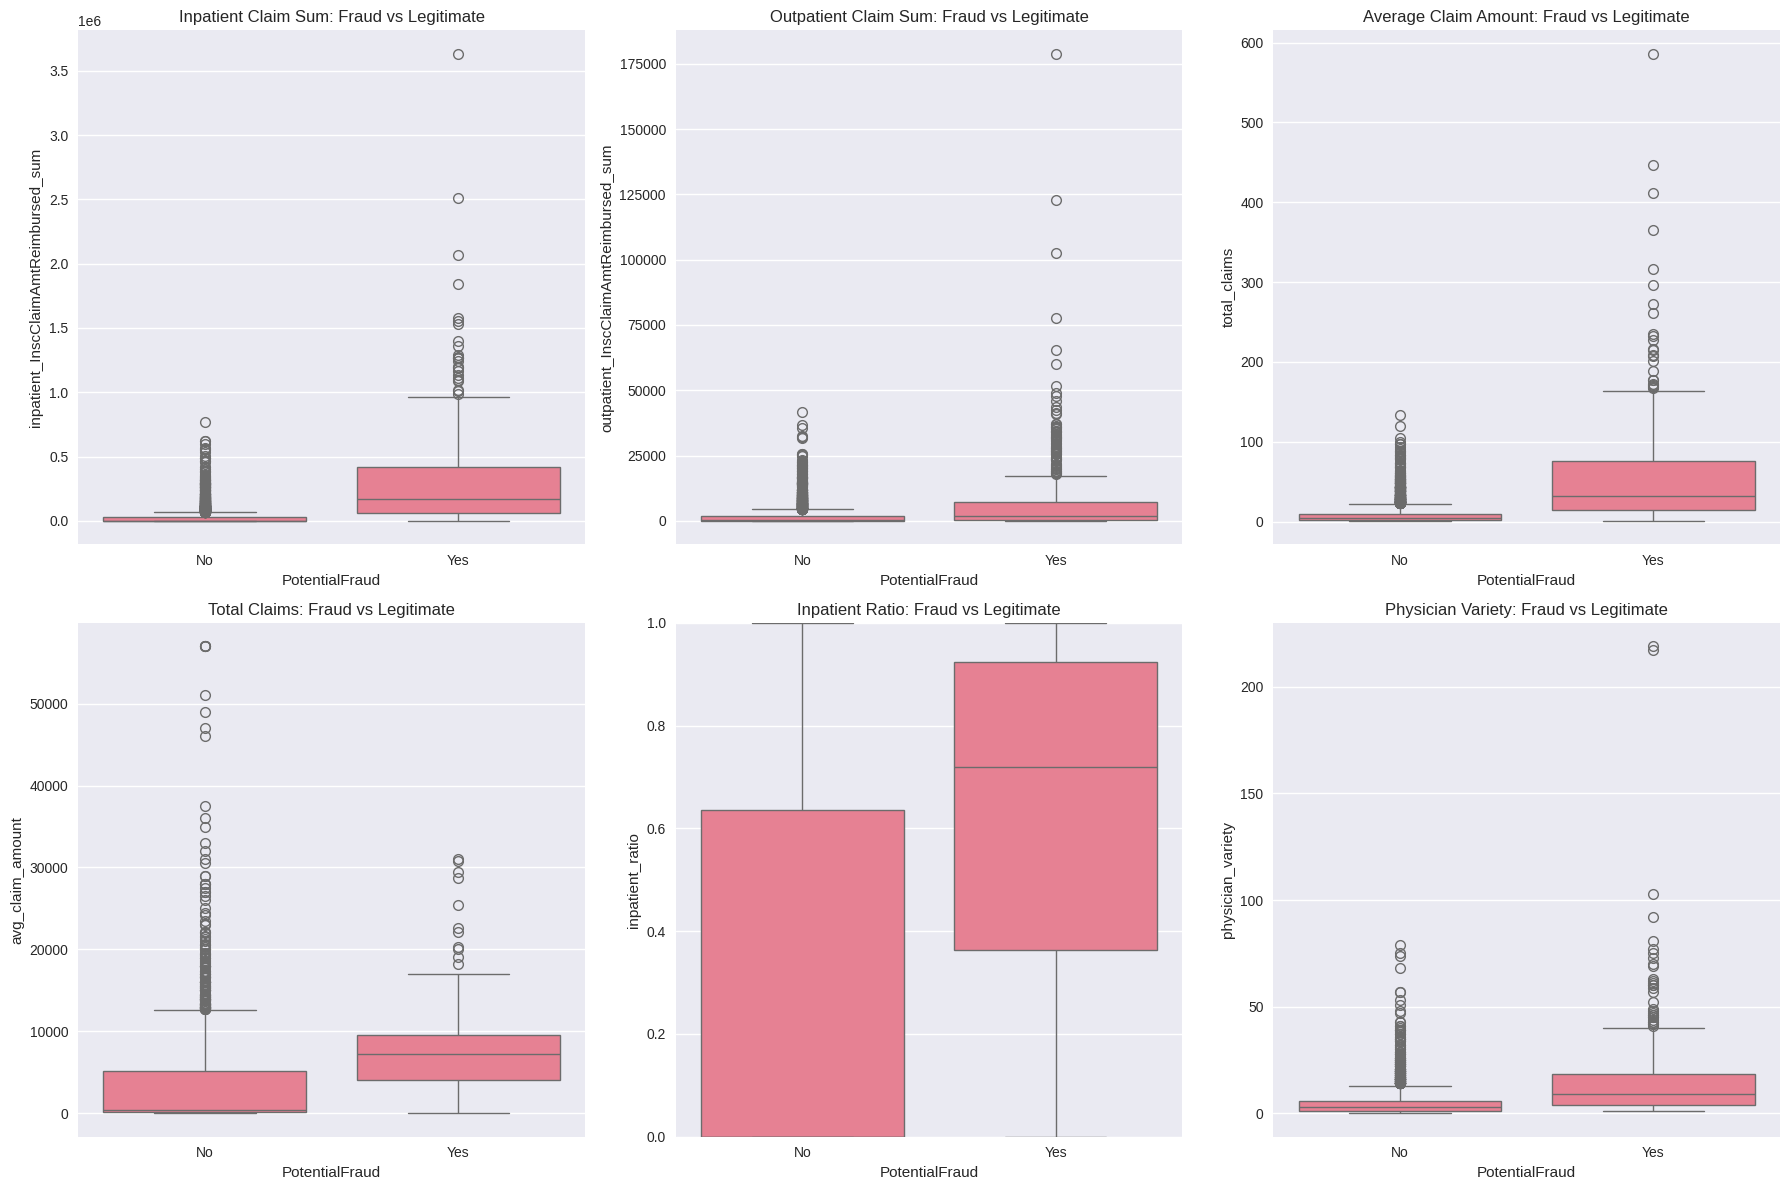

In [ ]:
print("\n7.3 Behavioral Differences - Visualizations:")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Create visualizations for existing metrics
plot_metrics = existing_metrics[:6]  # Take first 6 available metrics
plot_titles = [
    'Inpatient Claim Sum: Fraud vs Legitimate',
    'Outpatient Claim Sum: Fraud vs Legitimate',
    'Average Claim Amount: Fraud vs Legitimate',
    'Total Claims: Fraud vs Legitimate',
    'Inpatient Ratio: Fraud vs Legitimate',
    'Physician Variety: Fraud vs Legitimate'
]

for i, metric in enumerate(plot_metrics):
    row = i // 3
    col = i % 3
    try:
        sns.boxplot(x='PotentialFraud', y=metric, data=provider_analysis, ax=axes[row, col])
        axes[row, col].set_title(plot_titles[i])
        if i == 4:  # inpatient_ratio might have issues
            axes[row, col].set_ylim(0, 1)
    except Exception as e:
        axes[row, col].text(0.5, 0.5, f"Error plotting {metric}:\n{e}", ha='center', va='center')
        axes[row, col].set_title(plot_titles[i] + ' (Error)')

# Hide any unused subplots
for i in range(len(plot_metrics), 6):
    row = i // 3
    col = i % 3
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()


8. CORRELATION ANALYSIS AND PATTERNS

8.1 Correlation Heatmap:


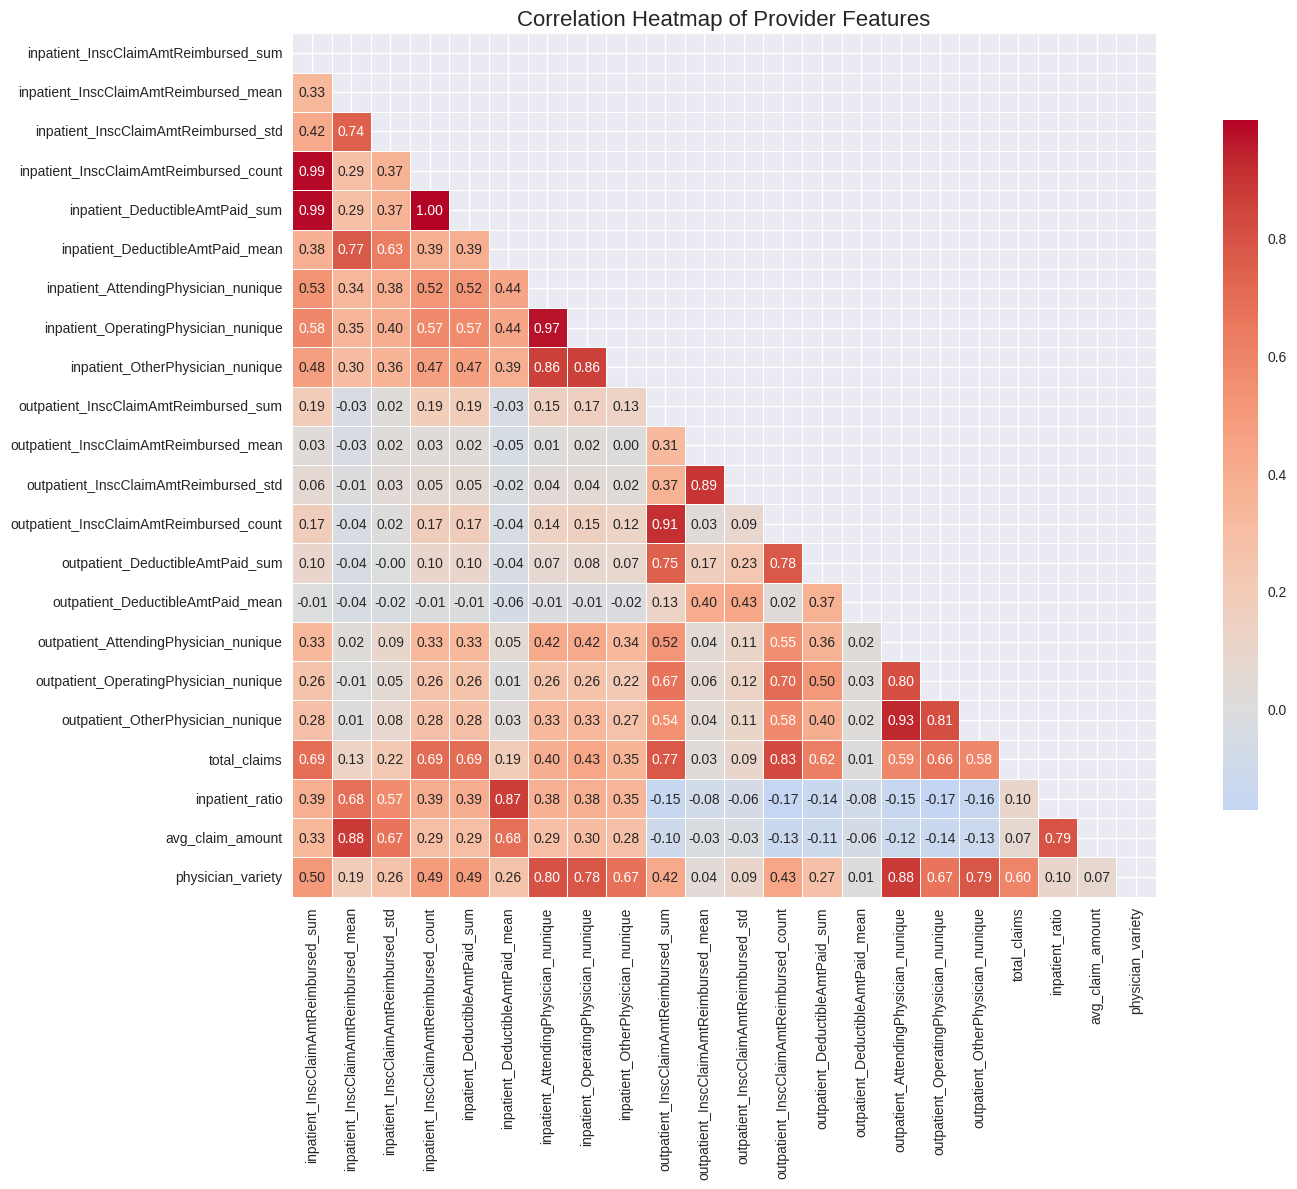


8.2 Fraud Correlation Analysis:
Top features correlated with fraud:


,0
inpatient_InscClaimAmtReimbursed_sum,0.520386
inpatient_DeductibleAmtPaid_sum,0.511765
inpatient_InscClaimAmtReimbursed_count,0.511329
total_claims,0.509212
inpatient_InscClaimAmtReimbursed_std,0.358349
inpatient_OperatingPhysician_nunique,0.341204
physician_variety,0.340245
inpatient_AttendingPhysician_nunique,0.313809
outpatient_InscClaimAmtReimbursed_count,0.299140
inpatient_DeductibleAmtPaid_mean,0.298178


In [ ]:
print("\n" + "="*80)
print("8. CORRELATION ANALYSIS AND PATTERNS")
print("="*80)

print("\n8.1 Correlation Heatmap:")

try:
    # Select numerical features for correlation
    numerical_features = provider_analysis.select_dtypes(include=[np.number]).columns
    # Remove constant columns
    numerical_features = [col for col in numerical_features if provider_analysis[col].nunique() > 1]

    if len(numerical_features) > 1:
        correlation_data = provider_analysis[numerical_features].corr()

        plt.figure(figsize=(16, 12))
        mask = np.triu(np.ones_like(correlation_data, dtype=bool))
        sns.heatmap(correlation_data, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
                    center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8})
        plt.title("Correlation Heatmap of Provider Features", fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough numerical features for correlation analysis")
except Exception as e:
    print(f"Error in correlation analysis: {e}")

print("\n8.2 Fraud Correlation Analysis:")
try:
    # Correlation with fraud (convert to numeric)
    provider_analysis['PotentialFraud_numeric'] = provider_analysis['PotentialFraud'].apply(
        lambda x: 1 if x == 'Yes' else 0 if x == 'No' else np.nan
    ).dropna()

    if len(numerical_features) > 0:
        fraud_correlations = provider_analysis[numerical_features].corrwith(
            provider_analysis['PotentialFraud_numeric']
        ).sort_values(ascending=False)

        print("Top features correlated with fraud:")
        display(fraud_correlations.head(10))
    else:
        print("No numerical features available for fraud correlation analysis")
except Exception as e:
    print(f"Error in fraud correlation analysis: {e}")


9. TRENDS AND PATTERNS SUMMARY

9.1 Key Findings Summary:


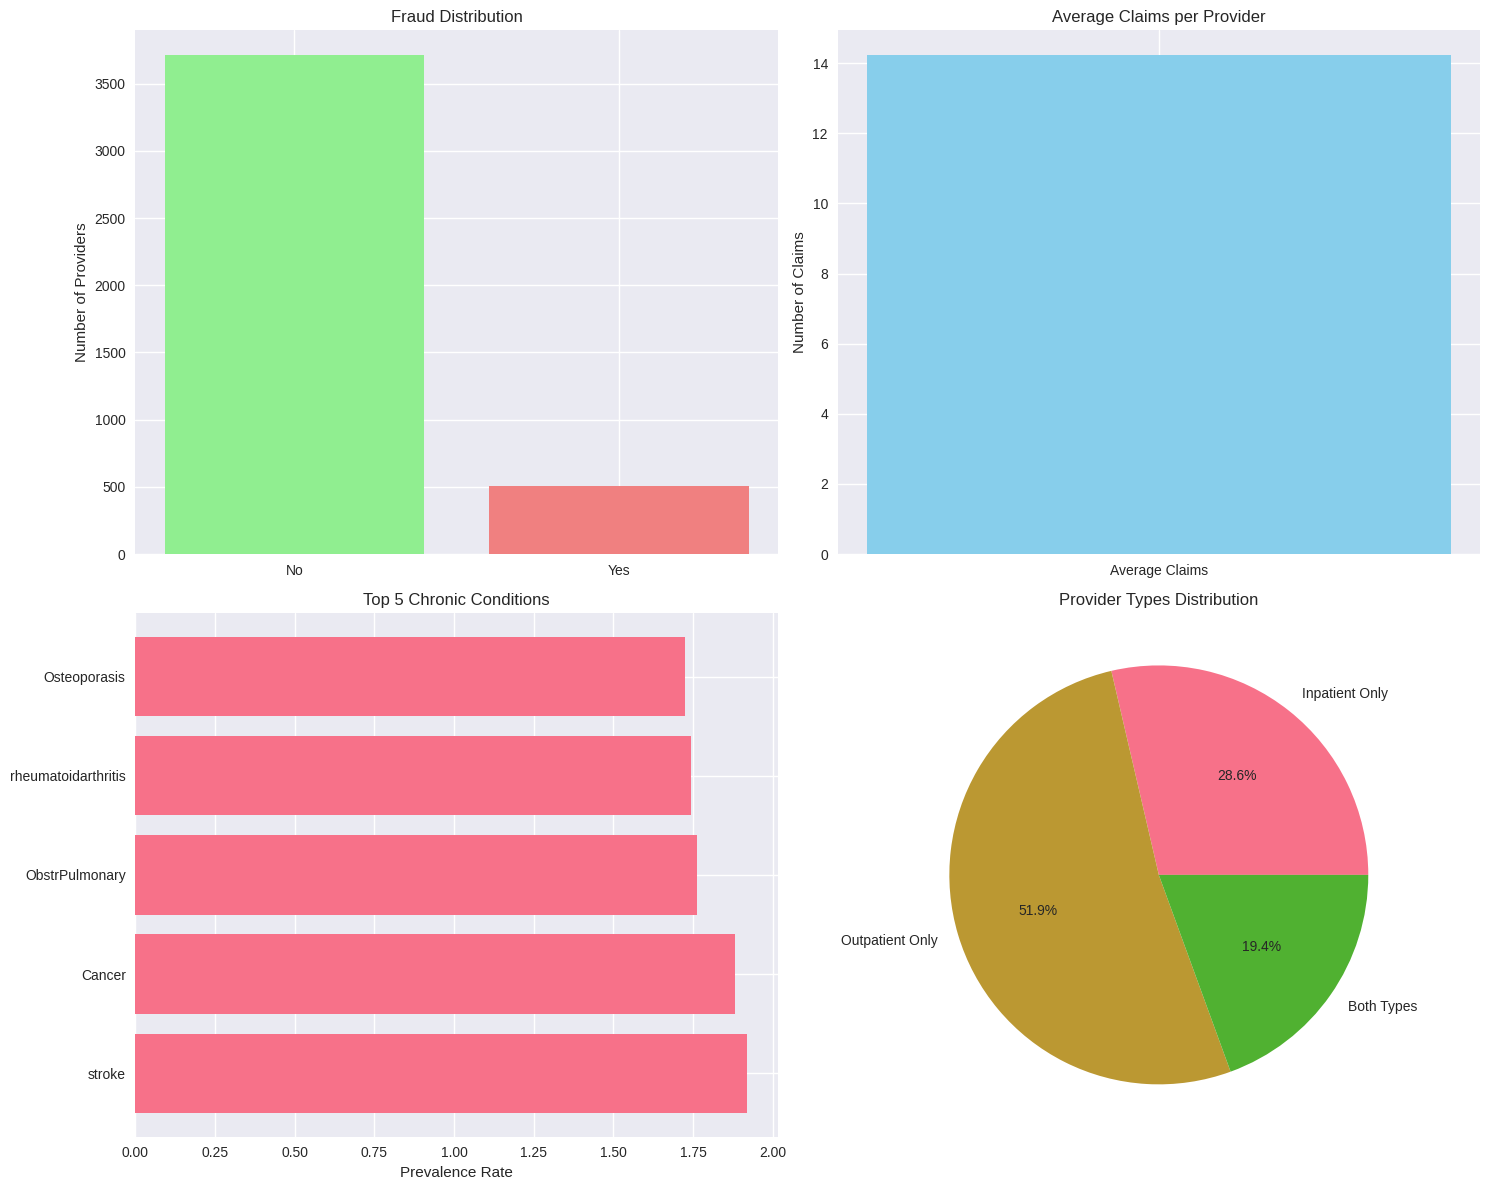


9.2 Final Data Quality Summary:
• Total providers: 4215
• Fraud rate: 11.93%
• Total claims analyzed: 59,963
• Total beneficiaries: 63,780
• Data completeness: 100.00%


In [ ]:
print("\n" + "="*80)
print("9. TRENDS AND PATTERNS SUMMARY")
print("="*80)

print("\n9.1 Key Findings Summary:")

# Create summary visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Basic fraud distribution
fraud_counts = provider_analysis['PotentialFraud'].value_counts()
axes[0,0].bar(fraud_counts.index, fraud_counts.values, color=['lightgreen', 'lightcoral'])
axes[0,0].set_title('Fraud Distribution')
axes[0,0].set_ylabel('Number of Providers')

# Plot 2: Claims overview
try:
    claim_data = [provider_analysis['total_claims'].mean()]
    axes[0,1].bar(['Average Claims'], claim_data, color='skyblue')
    axes[0,1].set_title('Average Claims per Provider')
    axes[0,1].set_ylabel('Number of Claims')
except:
    axes[0,1].text(0.5, 0.5, 'Claims data\nnot available', ha='center', va='center')
    axes[0,1].set_title('Average Claims per Provider')

# Plot 3: Chronic conditions impact
try:
    chronic_impact = beneficiary[chronic_cols].mean().sort_values(ascending=False).head(5)
    axes[1,0].barh(range(len(chronic_impact)), chronic_impact.values)
    axes[1,0].set_yticks(range(len(chronic_impact)))
    axes[1,0].set_yticklabels([col.replace('ChronicCond_', '') for col in chronic_impact.index])
    axes[1,0].set_title('Top 5 Chronic Conditions')
    axes[1,0].set_xlabel('Prevalence Rate')
except:
    axes[1,0].text(0.5, 0.5, 'Chronic conditions data\nnot available', ha='center', va='center')
    axes[1,0].set_title('Top 5 Chronic Conditions')

# Plot 4: Provider types
try:
    provider_types = [len(inpatient['Provider'].unique()), len(outpatient['Provider'].unique()), len(common_providers)]
    labels = ['Inpatient Only', 'Outpatient Only', 'Both Types']
    axes[1,1].pie(provider_types, labels=labels, autopct='%1.1f%%')
    axes[1,1].set_title('Provider Types Distribution')
except:
    axes[1,1].text(0.5, 0.5, 'Provider type data\nnot available', ha='center', va='center')
    axes[1,1].set_title('Provider Types Distribution')

plt.tight_layout()
plt.show()

print("\n9.2 Final Data Quality Summary:")
print(f"• Total providers: {len(provider_analysis)}")
print(f"• Fraud rate: {(provider_analysis['PotentialFraud'].value_counts(normalize=True).get('Yes', 0)*100):.2f}%")
print(f"• Total claims analyzed: {inpatient.shape[0] + outpatient.shape[0]:,}")
print(f"• Total beneficiaries: {beneficiary.shape[0]:,}")
print(f"• Data completeness: {(1 - provider_analysis.isnull().sum().sum() / (provider_analysis.shape[0] * provider_analysis.shape[1])) * 100:.2f}%")





10. OUTLIER DETECTION ANALYSIS

10.1 Outlier Detection in Claim Amounts:
Inpatient InscClaimAmtReimbursed:
  - IQR outliers: 1854 (7.48%)
  - Z-score outliers: 610 (2.46%)
Outpatient InscClaimAmtReimbursed:
  - IQR outliers: 5263 (14.97%)
  - Z-score outliers: 629 (1.79%)
Inpatient DeductibleAmtPaid:
  - IQR outliers: 0 (0.00%)
  - Z-score outliers: 0 (0.00%)
Outpatient DeductibleAmtPaid:
  - IQR outliers: 1407 (4.00%)
  - Z-score outliers: 872 (2.48%)


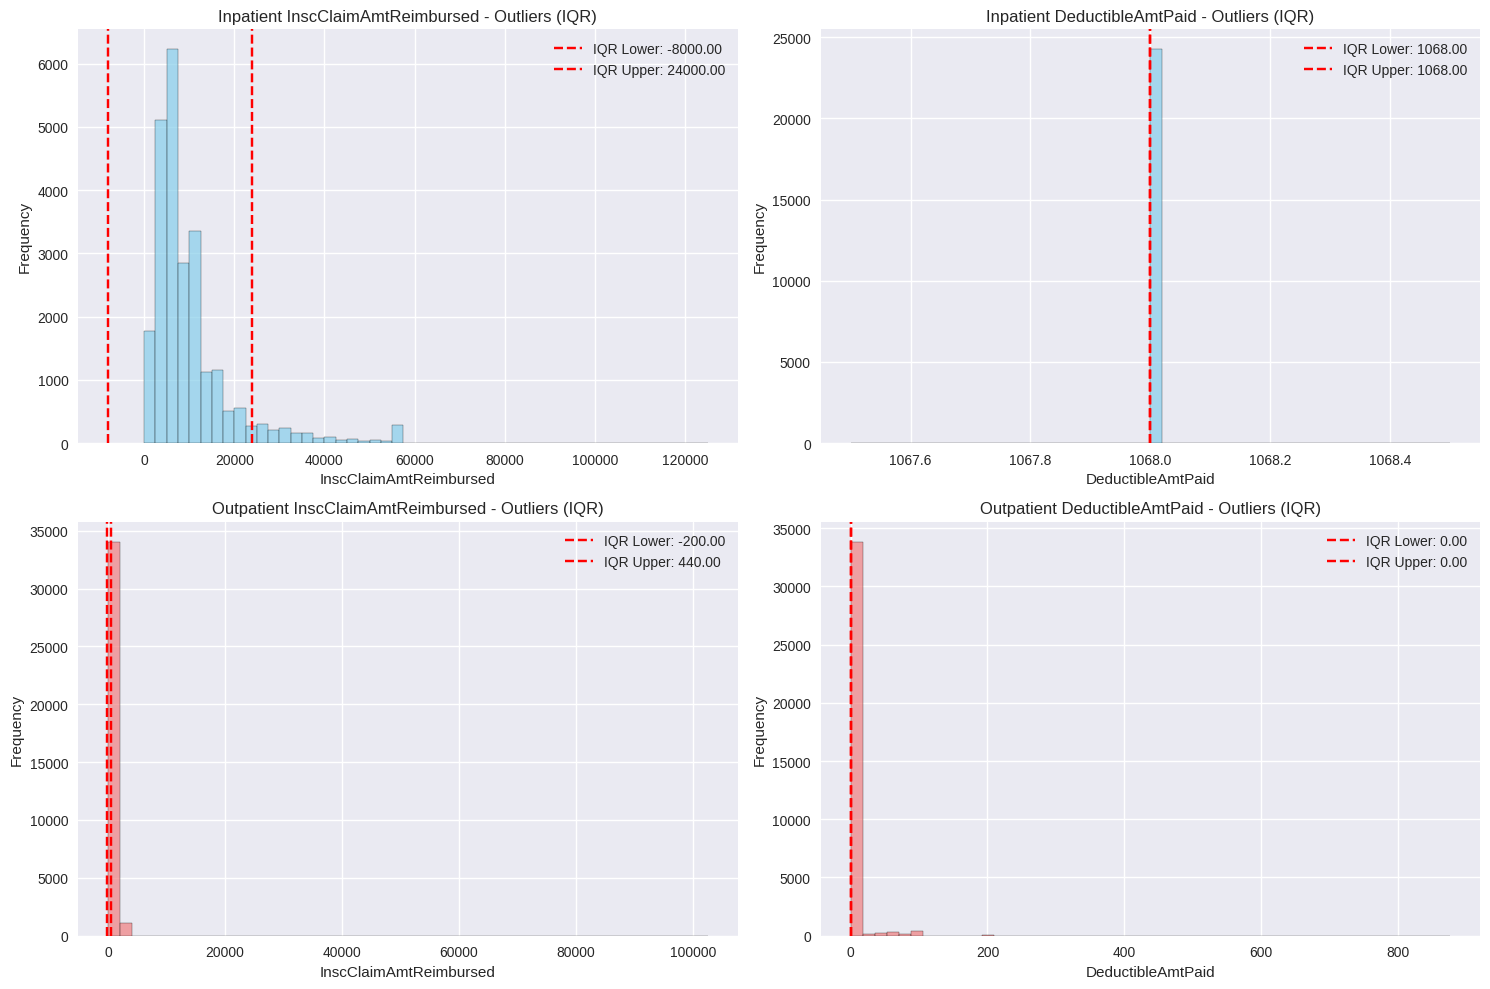


10.2 Provider-Level Outlier Analysis:

inpatient_InscClaimAmtReimbursed_sum:
  - IQR outliers: 521 providers
  - Z-score outliers: 91 providers
  - Fraud rate in outliers: 57.77%
  - Fraud rate in normal: 5.47%

outpatient_InscClaimAmtReimbursed_sum:
  - IQR outliers: 465 providers
  - Z-score outliers: 73 providers
  - Fraud rate in outliers: 33.12%
  - Fraud rate in normal: 9.31%

avg_claim_amount:
  - IQR outliers: 104 providers
  - Z-score outliers: 56 providers
  - Fraud rate in outliers: 16.35%
  - Fraud rate in normal: 11.82%


In [ ]:
print("\n" + "="*80)
print("10. OUTLIER DETECTION ANALYSIS")
print("="*80)

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    outliers = data[z_scores > threshold]
    return outliers

print("\n10.1 Outlier Detection in Claim Amounts:")

# Analyze claim amounts for outliers
claim_amount_cols = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(claim_amount_cols):
    # Inpatient outliers
    if col in inpatient.columns:
        inpatient_outliers_iqr, lower_iqr, upper_iqr = detect_outliers_iqr(inpatient, col)
        inpatient_outliers_zscore = detect_outliers_zscore(inpatient, col)

        axes[0,i].hist(inpatient[col].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,i].axvline(lower_iqr, color='red', linestyle='--', label=f'IQR Lower: {lower_iqr:.2f}')
        axes[0,i].axvline(upper_iqr, color='red', linestyle='--', label=f'IQR Upper: {upper_iqr:.2f}')
        axes[0,i].set_title(f'Inpatient {col} - Outliers (IQR)')
        axes[0,i].set_xlabel(col)
        axes[0,i].set_ylabel('Frequency')
        axes[0,i].legend()

        print(f"Inpatient {col}:")
        print(f"  - IQR outliers: {len(inpatient_outliers_iqr)} ({len(inpatient_outliers_iqr)/len(inpatient)*100:.2f}%)")
        print(f"  - Z-score outliers: {len(inpatient_outliers_zscore)} ({len(inpatient_outliers_zscore)/len(inpatient)*100:.2f}%)")

    # Outpatient outliers
    if col in outpatient.columns:
        outpatient_outliers_iqr, lower_iqr, upper_iqr = detect_outliers_iqr(outpatient, col)
        outpatient_outliers_zscore = detect_outliers_zscore(outpatient, col)

        axes[1,i].hist(outpatient[col].dropna(), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
        axes[1,i].axvline(lower_iqr, color='red', linestyle='--', label=f'IQR Lower: {lower_iqr:.2f}')
        axes[1,i].axvline(upper_iqr, color='red', linestyle='--', label=f'IQR Upper: {upper_iqr:.2f}')
        axes[1,i].set_title(f'Outpatient {col} - Outliers (IQR)')
        axes[1,i].set_xlabel(col)
        axes[1,i].set_ylabel('Frequency')
        axes[1,i].legend()

        print(f"Outpatient {col}:")
        print(f"  - IQR outliers: {len(outpatient_outliers_iqr)} ({len(outpatient_outliers_iqr)/len(outpatient)*100:.2f}%)")
        print(f"  - Z-score outliers: {len(outpatient_outliers_zscore)} ({len(outpatient_outliers_zscore)/len(outpatient)*100:.2f}%)")

plt.tight_layout()
plt.show()

print("\n10.2 Provider-Level Outlier Analysis:")
provider_amount_cols = ['inpatient_InscClaimAmtReimbursed_sum', 'outpatient_InscClaimAmtReimbursed_sum', 'avg_claim_amount']

for col in provider_amount_cols:
    if col in provider_analysis.columns:
        outliers_iqr, lower_iqr, upper_iqr = detect_outliers_iqr(provider_analysis, col)
        outliers_zscore = detect_outliers_zscore(provider_analysis, col)

        print(f"\n{col}:")
        print(f"  - IQR outliers: {len(outliers_iqr)} providers")
        print(f"  - Z-score outliers: {len(outliers_zscore)} providers")

        # Check fraud rate among outliers
        if len(outliers_iqr) > 0:
            fraud_rate_outliers = outliers_iqr['PotentialFraud'].value_counts(normalize=True).get('Yes', 0) * 100
            fraud_rate_normal = provider_analysis[~provider_analysis.index.isin(outliers_iqr.index)]['PotentialFraud'].value_counts(normalize=True).get('Yes', 0) * 100
            print(f"  - Fraud rate in outliers: {fraud_rate_outliers:.2f}%")
            print(f"  - Fraud rate in normal: {fraud_rate_normal:.2f}%")


11. PERCENTAGE FEATURES ENGINEERING

11.1 Creating Percentage-Based Features:
High-cost threshold - Inpatient: $20000.00
High-cost threshold - Outpatient: $700.00

11.2 New Percentage Features Summary:
Created 29 new percentage features:
  - pct_high_cost_inpatient
  - pct_high_cost_outpatient
  - pct_high_cost_total
  - pct_ChronicCond_Alzheimer_inpatient
  - pct_ChronicCond_Alzheimer_outpatient
  - pct_ChronicCond_Heartfailure_inpatient
  - pct_ChronicCond_Heartfailure_outpatient
  - pct_ChronicCond_KidneyDisease_inpatient
  - pct_ChronicCond_KidneyDisease_outpatient
  - pct_ChronicCond_Cancer_inpatient
  - pct_ChronicCond_Cancer_outpatient
  - pct_ChronicCond_ObstrPulmonary_inpatient
  - pct_ChronicCond_ObstrPulmonary_outpatient
  - pct_ChronicCond_Depression_inpatient
  - pct_ChronicCond_Depression_outpatient
  - pct_ChronicCond_Diabetes_inpatient
  - pct_ChronicCond_Diabetes_outpatient
  - pct_ChronicCond_IschemicHeart_inpatient
  - pct_ChronicCond_IschemicHeart_outpatient
  - pc

,pct_high_cost_inpatient,pct_high_cost_outpatient,pct_high_cost_total,pct_ChronicCond_Alzheimer_inpatient,pct_ChronicCond_Alzheimer_outpatient,pct_ChronicCond_Heartfailure_inpatient,pct_ChronicCond_Heartfailure_outpatient,pct_ChronicCond_KidneyDisease_inpatient,pct_ChronicCond_KidneyDisease_outpatient,pct_ChronicCond_Cancer_inpatient,...,pct_ChronicCond_Osteoporasis_inpatient,pct_ChronicCond_Osteoporasis_outpatient,pct_ChronicCond_rheumatoidarthritis_inpatient,pct_ChronicCond_rheumatoidarthritis_outpatient,pct_ChronicCond_stroke_inpatient,pct_ChronicCond_stroke_outpatient,pct_chronic_patients,pct_readmissions,pct_attending_physician,cost_per_physician
count,4215.0,4215.0,4215.0,4215.0,4215.0,4215.0,4215.0,4215.0,4215.0,4215.0,...,4215.0,4215.0,4215.0,4215.0,4215.0,4215.0,4215.0,4215.0,4215.000000,4215.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.678363,11561.347518
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323521,33463.265321
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,222.916667
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000,1675.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,9500.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,599440.000000



11.3 Fraud Analysis with New Features:
Top percentage features correlated with fraud:


,0
cost_per_physician,0.344216
pct_attending_physician,-0.292988
pct_high_cost_inpatient,NaN
pct_high_cost_outpatient,NaN
pct_high_cost_total,NaN
pct_ChronicCond_Alzheimer_inpatient,NaN
pct_ChronicCond_Alzheimer_outpatient,NaN
pct_ChronicCond_Heartfailure_inpatient,NaN
pct_ChronicCond_Heartfailure_outpatient,NaN
pct_ChronicCond_KidneyDisease_inpatient,NaN


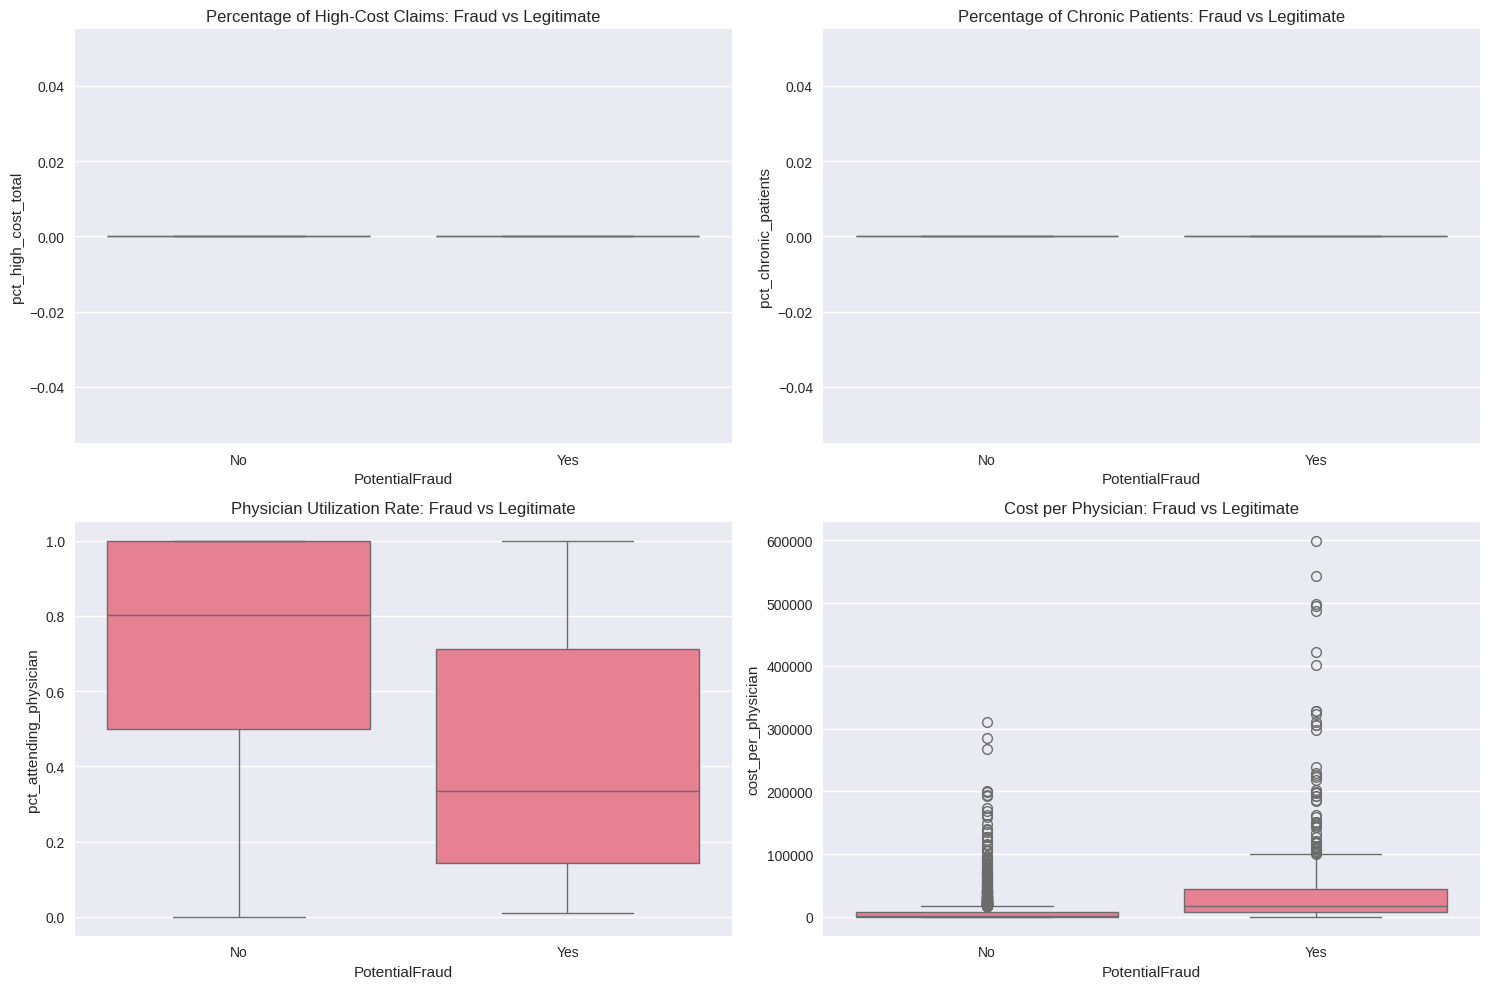

In [ ]:
print("\n" + "="*80)
print("11. PERCENTAGE FEATURES ENGINEERING")
print("="*80)

print("\n11.1 Creating Percentage-Based Features:")

# Define high-cost claim threshold (top 10%)
high_cost_threshold_inpatient = inpatient['InscClaimAmtReimbursed'].quantile(0.9)
high_cost_threshold_outpatient = outpatient['InscClaimAmtReimbursed'].quantile(0.9)

print(f"High-cost threshold - Inpatient: ${high_cost_threshold_inpatient:.2f}")
print(f"High-cost threshold - Outpatient: ${high_cost_threshold_outpatient:.2f}")

def create_percentage_features(provider_analysis, inpatient, outpatient, beneficiary):
    """Create percentage-based features for provider analysis"""

    # Provider-level percentage features
    provider_features = provider_analysis.copy()

    # 1. Percentage of high-cost claims by provider
    high_cost_inpatient = inpatient[inpatient['InscClaimAmtReimbursed'] > high_cost_threshold_inpatient].groupby('Provider').size()
    high_cost_outpatient = outpatient[outpatient['InscClaimAmtReimbursed'] > high_cost_threshold_outpatient].groupby('Provider').size()

    # Reindex and fill NaN for alignment before calculation
    high_cost_inpatient = high_cost_inpatient.reindex(provider_features.index, fill_value=0)
    high_cost_outpatient = high_cost_outpatient.reindex(provider_features.index, fill_value=0)

    provider_features['pct_high_cost_inpatient'] = (high_cost_inpatient / provider_features['inpatient_InscClaimAmtReimbursed_count']).fillna(0)
    provider_features['pct_high_cost_outpatient'] = (high_cost_outpatient / provider_features['outpatient_InscClaimAmtReimbursed_count']).fillna(0)
    provider_features['pct_high_cost_total'] = (
        (high_cost_inpatient + high_cost_outpatient) / provider_features['total_claims']
    ).fillna(0)

    # 2. Chronic conditions percentage
    # Convert chronic condition indicators to 0/1 (assuming 1=No, 2=Yes)
    beneficiary_chronic_binary = beneficiary[chronic_cols].apply(lambda x: np.where(x == 2, 1, 0))
    beneficiary_chronic_binary['BeneID'] = beneficiary['BeneID']

    # Merge beneficiary chronic conditions with claims
    inpatient_chronic = inpatient.merge(beneficiary_chronic_binary[['BeneID'] + chronic_cols], on='BeneID', how='left')
    outpatient_chronic = outpatient.merge(beneficiary_chronic_binary[['BeneID'] + chronic_cols], on='BeneID', how='left')

    # Calculate percentage of patients with chronic conditions
    for condition in chronic_cols:
        inpatient_condition_pct = inpatient_chronic.groupby('Provider')[condition].mean()
        outpatient_condition_pct = outpatient_chronic.groupby('Provider')[condition].mean()

        # Reindex and fill NaN for alignment
        provider_features[f'pct_{condition}_inpatient'] = inpatient_condition_pct.reindex(provider_features.index, fill_value=0)
        provider_features[f'pct_{condition}_outpatient'] = outpatient_condition_pct.reindex(provider_features.index, fill_value=0)

    # Overall chronic condition percentage
    provider_features['pct_chronic_patients'] = (
        provider_features[[f'pct_{cond}_inpatient' for cond in chronic_cols]].mean(axis=1) +
        provider_features[[f'pct_{cond}_outpatient' for cond in chronic_cols]].mean(axis=1)
    ) / 2
    provider_features['pct_chronic_patients'] = provider_features['pct_chronic_patients'].fillna(0) # Final fillna just in case

    # 3. Percentage of claims with various characteristics
    # Readmission rate (if AdmissionDt available)
    if 'AdmissionDt' in inpatient.columns:
        inpatient_sorted = inpatient.sort_values(['BeneID', 'AdmissionDt'])
        inpatient_sorted['time_to_next'] = inpatient_sorted.groupby('BeneID')['AdmissionDt'].diff().dt.days
        readmissions = inpatient_sorted[inpatient_sorted['time_to_next'] <= 30].groupby('Provider').size()
        readmissions = readmissions.reindex(provider_features.index, fill_value=0) # Reindex for alignment
        provider_features['pct_readmissions'] = (readmissions / provider_features['inpatient_InscClaimAmtReimbursed_count']).fillna(0)
    else:
        provider_features['pct_readmissions'] = 0

    # 4. Percentage of claims with different physician types
    provider_features['pct_attending_physician'] = np.where(
        provider_features['total_claims'] > 0,
        (provider_features['inpatient_AttendingPhysician_nunique'] +
         provider_features['outpatient_AttendingPhysician_nunique']) / provider_features['total_claims'],
        0
    )

    # 5. Cost efficiency ratios
    provider_features['cost_per_physician'] = np.where(
        provider_features['physician_variety'] > 0,
        (provider_features['inpatient_InscClaimAmtReimbursed_sum'] +
         provider_features['outpatient_InscClaimAmtReimbursed_sum']) / provider_features['physician_variety'],
        0
    )

    return provider_features

# Create enhanced features
provider_enhanced = create_percentage_features(provider_analysis, inpatient, outpatient, beneficiary)

print("\n11.2 New Percentage Features Summary:")
percentage_features = [col for col in provider_enhanced.columns if col.startswith('pct_') or col == 'cost_per_physician']
print(f"Created {len(percentage_features)} new percentage features:")
for feature in percentage_features:
    print(f"  - {feature}")

display(provider_enhanced[percentage_features].describe())

print("\n11.3 Fraud Analysis with New Features:")
fraud_correlations_new = provider_enhanced[percentage_features].corrwith(
    provider_enhanced['PotentialFraud_numeric']
).sort_values(ascending=False)

print("Top percentage features correlated with fraud:")
display(fraud_correlations_new.head(10))

# Visualization of key percentage features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# High-cost claims vs fraud
sns.boxplot(x='PotentialFraud', y='pct_high_cost_total', data=provider_enhanced, ax=axes[0,0])
axes[0,0].set_title('Percentage of High-Cost Claims: Fraud vs Legitimate')

# Chronic patients vs fraud
sns.boxplot(x='PotentialFraud', y='pct_chronic_patients', data=provider_enhanced, ax=axes[0,1])
axes[0,1].set_title('Percentage of Chronic Patients: Fraud vs Legitimate')

# Physician utilization vs fraud
sns.boxplot(x='PotentialFraud', y='pct_attending_physician', data=provider_enhanced, ax=axes[1,0])
axes[1,0].set_title('Physician Utilization Rate: Fraud vs Legitimate')

# Cost efficiency vs fraud
sns.boxplot(x='PotentialFraud', y='cost_per_physician', data=provider_enhanced, ax=axes[1,1])
axes[1,1].set_title('Cost per Physician: Fraud vs Legitimate')

plt.tight_layout()
plt.show()